Loosely based on armory/tests/test_pytorch/test_framework_dataset

In [1]:
import torch
import matplotlib.pyplot as plt

from armory import paths
from armory.data import datasets
from armory.data import adversarial_datasets

In [2]:
DATASET_DIR = paths.HostPaths().dataset_dir
print(DATASET_DIR)

/root/.armory/datasets


In [3]:
batch_size = 16

clean_ds = datasets.resisc45(
    split_type='test', 
    epochs=1, 
    batch_size=batch_size, 
    dataset_dir=DATASET_DIR,
    framework='pytorch')

assert isinstance(clean_ds, torch.utils.data.DataLoader)
labels, images = next(iter(clean_ds))

100%|██████████| 409M/409M [00:06<00:00, 68.0MB/s] 


In [12]:
adv_patch = adversarial_datasets.resisc45_adversarial_224x224(
    split_type="adversarial",
    epochs=1,
    batch_size=16,
    dataset_dir=DATASET_DIR,
    preprocessing_fn=None,
    cache_dataset=True,
    framework="numpy",
    clean_key="clean",
    adversarial_key="adversarial_univpatch",
    targeted=False,
)

In [13]:
adv_ptb = adversarial_datasets.resisc45_adversarial_224x224(
    split_type="adversarial",
    epochs=1,
    batch_size=16,
    dataset_dir=DATASET_DIR,
    preprocessing_fn=None,
    cache_dataset=True,
    framework="numpy",
    clean_key="clean",
    adversarial_key="adversarial_univperturbation",
    targeted=False,
)

In [17]:
patch_images, _ = next(iter(adv_patch))

In [18]:
ptb_images, _ = next(iter(adv_ptb))

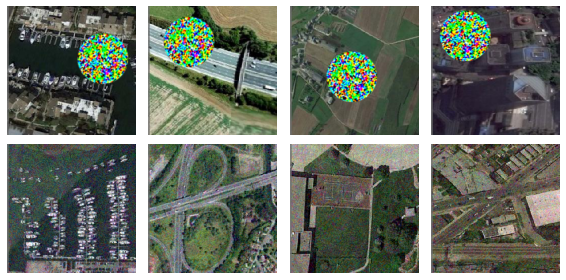

In [21]:
fig, axes = plt.subplots(2, batch_size // 4, figsize=(8, 4))

for i in range(batch_size // 4):
    #axes[0, i].imshow(patch_images[0][i])
    axes[0, i].imshow(patch_images[1][i])
    axes[1, i].imshow(ptb_images[1][i])
    axes[0, i].axis('off')
    axes[1, i].axis('off')
    #axes[2, i].axis('off')
plt.tight_layout()    

In [28]:
import os.path as osp

'/armory/datasets'

In [31]:
fig.savefig(osp.join(paths.DockerPaths().dataset_dir, 'resisc45.jpg'))

In [10]:
x = images[0]

In [13]:
x = x.transpose(0, 3, 1, 2)  # from NHWC to NCHW

In [15]:
x.shape

(16, 3, 224, 224)

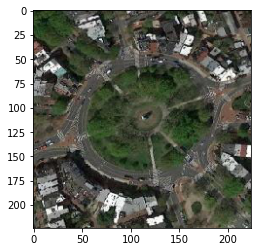

In [16]:
plt.imshow(x.transpose(0, 2, 3, 1)[0])

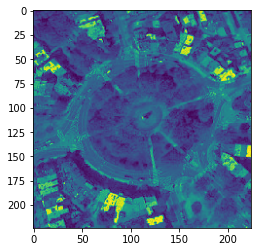

In [17]:
plt.imshow(x[0, 0])